# Project: Wrangle and analyse Data

## 1- Gathering data

In [888]:
import pandas as pd
import numpy as np
import json
import requests

In [889]:
#transform the txt to a json file to fill a dataframe
Data = []
with open('tweet-json.txt', encoding='utf-8') as file:
    for line in file:
        Data.append(json.loads(line))
#We fill the Dataframe
tweet=pd.DataFrame(Data)
#We need to get rid of some columns
#We are going to select 3 columns of interests: 
columns = df[['id', 'retweet_count', 'favorite_count']]
tweet=pd.DataFrame(columns)
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [890]:
tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [891]:
#Now we import our TSV file
predictions=pd.read_csv('image-predictions.tsv', sep='\t')
#we look into it.
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [892]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [893]:
twitter_dogs = pd.read_csv('twitter-archive-enhanced.csv')

## 2- Cleaning Data

In [894]:
twitter_dogs.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [895]:
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Define steps for cleaning

### Quality issues

### Tidiness issues

### Drop unecessary columns

##### Define: 'retweeted_status_timestamp', 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_user_id', 'in_reply_to_status_id','expanded_urls' seems to not be useful for our analysis.

### Code

In [896]:
twitter_dogs_clean=twitter_dogs.copy()
tweet_clean=tweet.copy()
predictions_clean=predictions.copy()

In [897]:
twitter_dogs_clean.drop(['retweeted_status_timestamp','expanded_urls', 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_user_id', 'in_reply_to_status_id'],axis=1, inplace=True)

In [898]:
twitter_dogs_clean.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### 'Source' column containing non necessary terms

##### Define: We are giong to stay with the social media in question for this column like Twitter for iphone, Twitter for web, Vine, Tweetdeck. We will have to assign a website based on one of the four urls. I could have used Regex but It would have much complicated.

### Code

In [899]:
twitter_dogs_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [900]:
lenght=twitter_dogs_clean.source.shape[0]

In [901]:
for i in range(twitter_dogs_clean.shape[0]):
    if twitter_dogs_clean.source[i] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        twitter_dogs_clean.source[i]='Twitter for iPhone'
    if twitter_dogs_clean.source[i] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        twitter_dogs_clean.source[i]='Vine'
    if twitter_dogs_clean.source[i] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        twitter_dogs_clean.source[i]='Twitter Web Client'
    if twitter_dogs_clean.source[i] == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        twitter_dogs_clean.source[i]='Tweetdeck'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/

In [902]:
twitter_dogs_clean.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
Tweetdeck               11
Name: source, dtype: int64

### No name for some dogs

#### Dogs has the 'a' or 'None' name, in this case we're going to set It as null.

### Code

In [903]:
twitter_dogs_clean.name.value_counts()
#We need to set the name value of the 'None' and 'a' to NaN

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Cecil        1
Roscoe       1
Horace       1
Tebow        1
Kawhi        1
Name: name, Length: 957, dtype: int64

In [904]:
for i in range(twitter_dogs_clean.shape[0]):
    if twitter_dogs_clean.name[i]=='a' or twitter_dogs_clean.name[i]=='None':
        twitter_dogs_clean.name[i]=np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [905]:
twitter_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1556 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


### Predictions : Drop unecessary columns

### Code 

In [906]:
predictions_clean.drop(['jpg_url'],axis=1,inplace=True)

### Wrong numerators and denominators

#### Some numerators and denominators have wrong values, we will figure the true value and will set it to the mean value if we can't.

### Code

In [907]:
twitter_dogs_clean.query('rating_denominator>20').rating_numerator.value_counts()

60     1
121    1
88     1
144    1
84     1
50     1
80     1
143    1
45     1
44     1
204    1
99     1
165    1
Name: rating_numerator, dtype: int64

In [908]:
mean=twitter_dogs_clean.query('rating_numerator<20')['rating_numerator'].mean()
print(mean)

10.694122694122694


In [909]:
twitter_dogs_clean.rating_denominator=10

In [910]:
for i in range(twitter_dogs_clean.shape[0]):
    if twitter_dogs_clean.rating_numerator[i]>20:
        twitter_dogs_clean.rating_numerator[i]=mean
#We assign to those value the mean so It will not impact too much our further analysis.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [911]:
twitter_dogs_clean.query('rating_numerator>20')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# Tidiness issues

###  Columns 'doggo','floofer','pupper','puppo' are not variables and should represent just one column called 'dog_type'

#### Define: we are going to change the four columns into one columns. We will use the melt function.

### Code

In [912]:
twitter_dogs_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [913]:
twitter_dogs_clean=twitter_dogs_clean.reset_index()
for i in range(twitter_dogs_clean.shape[0]):
    if twitter_dogs_clean.doggo[i]=='None':
        twitter_dogs_clean.doggo[i]=''
    if twitter_dogs_clean.floofer[i]=='None':
        twitter_dogs_clean.floofer[i]=''
    if twitter_dogs_clean.pupper[i]=='None':
        twitter_dogs_clean.pupper[i]=''
    if twitter_dogs_clean.puppo[i]=='None':
        twitter_dogs_clean.puppo[i]=''

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launche

In [914]:
twitter_dogs_clean['dog_type']=twitter_dogs_clean.doggo+twitter_dogs_clean.floofer+twitter_dogs_clean.pupper+twitter_dogs_clean.puppo


In [915]:
for i in range(twitter_dogs_clean.shape[0]):
    twitter_dogs_clean.dog_type[i]=twitter_dogs_clean.dog_type[i].replace('doggopupper','doggo/pupper')
    twitter_dogs_clean.dog_type[i]=twitter_dogs_clean.dog_type[i].replace('doggopuppo','doggo/puppo')
    twitter_dogs_clean.dog_type[i]=twitter_dogs_clean.dog_type[i].replace('doggofloofer','doggo/floofer')
twitter_dogs_clean.dog_type.value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

                 1976
pupper            245
doggo              83
puppo              29
doggo/pupper       12
floofer             9
doggo/puppo         1
doggo/floofer       1
Name: dog_type, dtype: int64

In [916]:
#We remove the unecessary columns
twitter_dogs_clean.drop(['puppo','pupper','floofer','doggo'],axis=1,inplace=True)

In [917]:
twitter_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
index                 2356 non-null int64
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1556 non-null object
dog_type              2356 non-null object
dtypes: int64(4), object(5)
memory usage: 165.8+ KB


### Type of Timestamp columns, should be time.

### Code

In [918]:
twitter_dogs_clean.timestamp=pd.to_datetime(twitter_dogs_clean.timestamp)

In [919]:
twitter_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
index                 2356 non-null int64
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1556 non-null object
dog_type              2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 165.8+ KB


### dog_type, source should be categorical variables.

### Code

In [920]:
twitter_dogs_clean.source = twitter_dogs_clean.source.astype('category')
twitter_dogs_clean.dog_type = twitter_dogs_clean.dog_type.astype('category')

In [921]:
twitter_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
index                 2356 non-null int64
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null category
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1556 non-null object
dog_type              2356 non-null category
dtypes: category(2), datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 134.1+ KB


### Need a new columns for rating_numerator/rating_denominator

### Code

In [922]:
twitter_dogs_clean['rating']=twitter_dogs_clean['rating_numerator'].astype(str)+'/'+twitter_dogs_clean['rating_denominator'].astype(str)
twitter_dogs_clean.rating.head()

0    13/10
1    13/10
2    12/10
3    13/10
4    12/10
Name: rating, dtype: object

In [923]:
twitter_dogs_clean.drop(['rating_denominator'],axis=1, inplace=True) #We keep the rating numerator as a float

### Change variables types

### Code

In [1030]:
predictions.p1=predictions.p1.astype('category')
predictions.p2=predictions.p2.astype('category')
predictions.p3=predictions.p3.astype('category')

In [1031]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


# Merging all datasets

##### Define: Since our cleaning operations are done we are going to merge the three datasets in one using their tweet_id as the key.

### Code

In [924]:
tweet_clean.rename(columns={'id':'tweet_id'},inplace=True)

In [925]:
predictions_clean.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [926]:
df_result_clean = pd.merge(tweet_clean, predictions_clean, on='tweet_id')

In [927]:
df_result_clean=pd.merge(df_result_clean, twitter_dogs_clean, on='tweet_id')

In [928]:
df_result_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id            2073 non-null int64
retweet_count       2073 non-null int64
favorite_count      2073 non-null int64
img_num             2073 non-null int64
p1                  2073 non-null object
p1_conf             2073 non-null float64
p1_dog              2073 non-null bool
p2                  2073 non-null object
p2_conf             2073 non-null float64
p2_dog              2073 non-null bool
p3                  2073 non-null object
p3_conf             2073 non-null float64
p3_dog              2073 non-null bool
index               2073 non-null int64
timestamp           2073 non-null datetime64[ns, UTC]
source              2073 non-null category
text                2073 non-null object
rating_numerator    2073 non-null int64
name                1441 non-null object
dog_type            2073 non-null category
rating              2073 non-null object
dtypes: bool(3), categor

In [929]:
df_result_clean.to_csv('twitter_archive_master.csv')

# Visualization and insights

In [938]:
df_result_clean.describe()

,tweet_id,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,index,rating_numerator
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000
mean,7.383634e+17,2976.089243,8556.718283,1.203570,0.594532,1.346665e-01,6.034005e-02,1224.642547,10.584660
std,6.780118e+16,5054.897526,12098.640994,0.561856,0.271234,1.006830e-01,5.092769e-02,681.710006,2.181153
min,6.660209e+17,16.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.764706e+17,634.000000,1674.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,643.000000,10.000000
50%,7.119681e+17,1408.000000,3864.000000,1.000000,0.588230,1.186220e-01,4.947150e-02,1243.000000,11.000000
75%,7.931959e+17,3443.000000,10937.000000,1.000000,0.843911,1.955730e-01,9.193000e-02,1825.000000,12.000000
max,8.924206e+17,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,2355.000000,15.000000


Text(0.5, 1.0, 'Dog types by elements count')

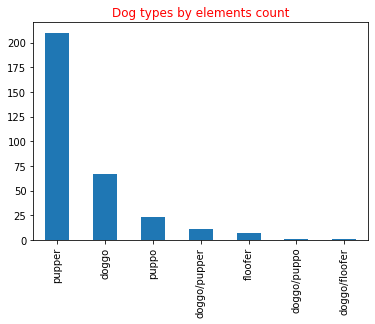

In [953]:
import matplotlib.pyplot as plt
%matplotlib inline
df_result_clean.dog_type.value_counts()[1:].plot(kind='bar',y='dog_type')
plt.title('Dog types by elements count', c='r')

In [939]:
df_result_clean.head()

,tweet_id,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,...,p3_conf,p3_dog,index,timestamp,source,text,rating_numerator,name,dog_type,rating
0,892420643555336193,8853,39467,1,orange,0.097049,False,bagel,0.085851,False,...,0.076110,False,0,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,,13/10
1,892177421306343426,6514,33819,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,...,0.068957,True,1,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,,13/10
2,891815181378084864,4328,25461,1,Chihuahua,0.716012,True,malamute,0.078253,True,...,0.031379,True,2,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,,12/10
3,891689557279858688,8964,42908,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,...,0.040836,False,3,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,,13/10
4,891327558926688256,9774,41048,2,basset,0.555712,True,English_springer,0.225770,True,...,0.175219,True,4,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,,12/10


Text(0.5, 1.0, 'Most common tweet hours')

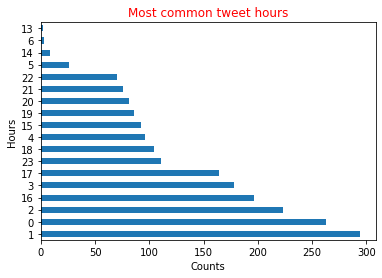

In [955]:
df_result_clean.timestamp.dt.hour.value_counts().plot(kind='barh')
plt.ylabel('Hours')
plt.xlabel('Counts')
plt.title('Most common tweet hours',c='r')

## Confidence interval

In [971]:
sample=df_result_clean.rating_numerator.sample(300)
sample_means = np.random.choice(sample, size=(10000, 200)).mean(axis=1)
sample_means

array([10.53 , 10.615, 10.37 , ..., 10.49 , 10.6  , 10.395])

In [972]:
left, right = np.percentile(sample_means, 2.5), np.percentile(sample_means, 97.5)
print(left, right)

10.185 10.740124999999997


Text(0.5, 0, 'rating numerator mean')

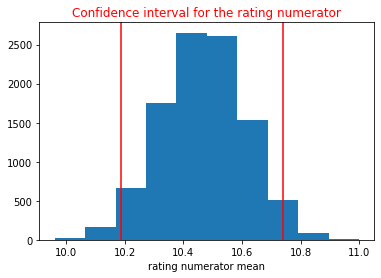

In [987]:
plt.hist(sample_means)
plt.axvline(x=left, color='r')
plt.axvline(x=right, c='r')
plt.title('Confidence interval for the rating numerator',c='r')
plt.xlabel('rating numerator mean')

In [985]:
left_area=1-(sample_means>left).mean()
right_area=1-(sample_means<right).mean()
print('left area is: ', left_area)
print('right area is: ',right_area)
sum_area=left_area+right_area
print('Between the two: ', sum_area)

left area is:  0.026000000000000023
right area is:  0.025000000000000022
Between the two:  0.051000000000000045


(array([1.918e+03, 1.030e+02, 3.200e+01, 7.000e+00, 5.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.60000e+01, 7.96590e+03, 1.59158e+04, 2.38657e+04, 3.18156e+04,
        3.97655e+04, 4.77154e+04, 5.56653e+04, 6.36152e+04, 7.15651e+04,
        7.95150e+04]),
 <a list of 10 Patch objects>)

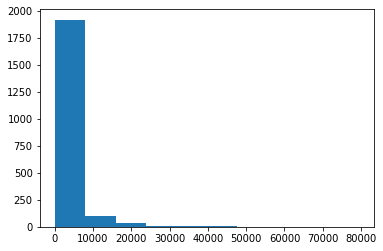

In [991]:
plt.hist(df_result_clean.retweet_count)

{'whiskers': [<matplotlib.lines.Line2D at 0x1551f52d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1552f6650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1551f5a10>],
 'medians': [<matplotlib.lines.Line2D at 0x1552e4150>],
 'fliers': [<matplotlib.lines.Line2D at 0x15541a5d0>],
 'means': []}

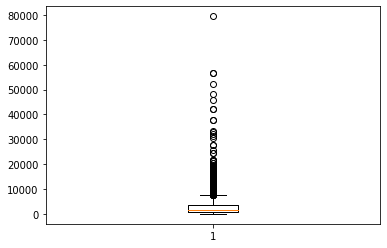

In [992]:
plt.boxplot(df_result_clean.retweet_count)

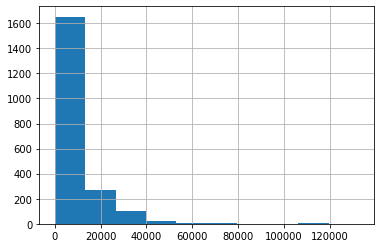

In [998]:
df_result_clean.favorite_count.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x155535050>,
 'caps': [<matplotlib.lines.Line2D at 0x1554b45d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x155535690>],
 'medians': [<matplotlib.lines.Line2D at 0x155531d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1554b4c10>],
 'means': []}

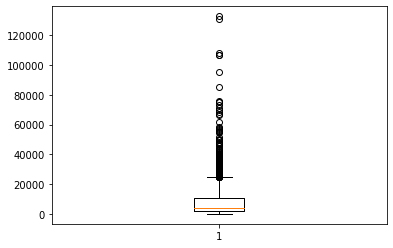

In [1001]:
plt.boxplot(df_result_clean.favorite_count)

In [1014]:
df_result_clean['intercept']=1
import statsmodels.api as sm
model = sm.OLS(df_result_clean.favorite_count,df_result_clean[['retweet_count','intercept']])
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     3449.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:40:23   Log-Likelihood:                -21413.
No. Observations:                2073   AIC:                         4.283e+04
Df Residuals:                    2071   BIC:                         4.284e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
retweet_count     1.8920      0.032     58.732      0.000       1.829       1.955
intercept      2926.0633    188.927     15.488      0.000    2555.557    3296.570
==============================================================================
Omnibus:                     1515.027   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150199.520
Skew:                          -2.670   Prob(JB):                         0.00
Kurtosis:                      44.357   Cond. No.                     6.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1020]:
model = sm.OLS(df_result_clean['rating_numerator'], df_result_clean[['intercept','retweet_count']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           9.03e-46
Time:                        14:47:27   Log-Likelihood:                -4456.6
No. Observations:                2073   AIC:                             8917.
Df Residuals:                    2071   BIC:                             8929.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        10.1934      0.053    192.455      0.000      10.090      10.297
retweet_count     0.0001   9.03e-06     14.556      0.000       0.000       0.000
==============================================================================
Omnibus:                      674.347   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2131.276
Skew:                          -1.646   Prob(JB):                         0.00
Kurtosis:                       6.720   Cond. No.                     6.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""